In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import logging
logging.basicConfig(
    format="%(asctime)s | %(levelname)-8s | %(name)-12s | %(message)s",
)
log = logging.getLogger("notebook")
log.setLevel("INFO")

import sys
sys.path.append("../")

from src import probabilistic_integrate_fire as pif

In [10]:
pif.log.setLevel("DEBUG")
pif.enable_tqdm()

system = pif.network(
    N=10_000,
    k=30,
    h=0, # Hz, per neuron
    rep=0,
    g=3,
    J=10,
    duration_record=10,
)
system.run()




2023-03-22 17:22:39,953 | DEBUG    | pif          | measured k without self-coupling: 29.9998
2023-03-22 17:22:39,966 | DEBUG    | pif          | mean input at full activity measured from adjacency matrix: 10.016709864622012
2023-03-22 17:22:41,603 | DEBUG    | pif          | mean input at full activity measured from adjacency matrix: -22.075477234099125
2023-03-22 17:22:45,223 | DEBUG    | pif          | largest eigenvalue:[5.71121514]
2023-03-22 17:22:45,224 | DEBUG    | pif          | Equilibrating
Equilibrating: 0it [00:00, ?it/s]
2023-03-22 17:22:45,225 | DEBUG    | pif          | Recording
Recording: 100%|██████████| 10000/10000 [00:04<00:00, 2312.35it/s]
2023-03-22 17:22:49,552 | INFO     | pif          | simulation run done!


(0.8912509381337456, 1.1)

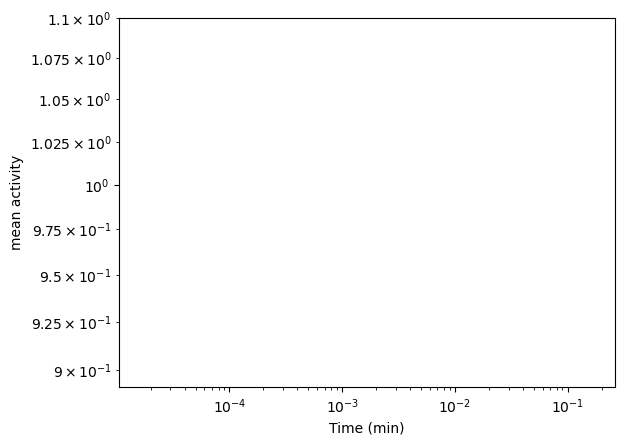

In [11]:
fig, ax = plt.subplots(nrows=1, sharex=True)
y = system.ts_activity
ax.plot(np.arange(len(y))/60*system.dt, y )
ax.set_xlabel("Time (min)")
ax.set_ylabel("mean activity")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(top=1.1)


In [65]:
gs=[0.1,0.2,0.3,0.4, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 10, 20]
ts=[]
lam=[]
for g in gs:
    print(g)
    system = pif.network(
        N=10_000,
        k=50,
        h=0, # Hz, per neuron
        rep=0,
        g=g,
        J=8,
        duration_record=20,
    )
    # not fully active initial condition to avoid instant drop to zero activity for larger g
    system.state[np.random.random(system.N) > 0.1] = 0
    system.run()
    ts.append(system.ts_activity)
    lam.append(system._lambda)

0.1


2023-03-23 21:47:17,571 | INFO     | pif          | simulation run done!


0.2


2023-03-23 21:47:31,440 | INFO     | pif          | simulation run done!


0.3


2023-03-23 21:47:45,773 | INFO     | pif          | simulation run done!


0.4


2023-03-23 21:47:59,548 | INFO     | pif          | simulation run done!


0.5


2023-03-23 21:48:12,377 | INFO     | pif          | simulation run done!


1.0


2023-03-23 21:48:26,977 | INFO     | pif          | simulation run done!


1.5


2023-03-23 21:48:42,032 | INFO     | pif          | simulation run done!


2.0


2023-03-23 21:48:56,245 | INFO     | pif          | simulation run done!


3.0


2023-03-23 21:49:10,376 | INFO     | pif          | simulation run done!


4.0


2023-03-23 21:49:30,973 | INFO     | pif          | simulation run done!


5.0


2023-03-23 21:49:47,127 | INFO     | pif          | simulation run done!


10


2023-03-23 21:50:04,415 | INFO     | pif          | simulation run done!


20


2023-03-23 21:50:18,284 | INFO     | pif          | simulation run done!


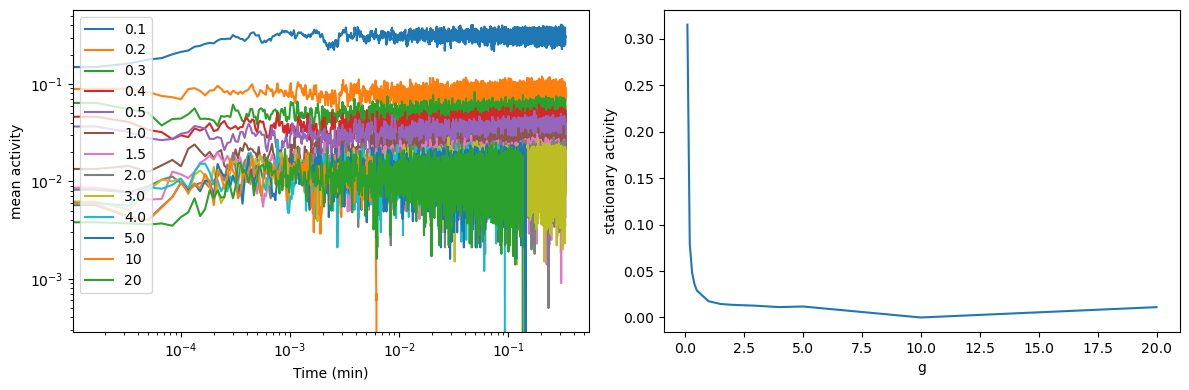

In [70]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
a=[]
for (i,g) in enumerate(gs):
    y = ts[i]
    x = np.arange(len(y))/60*system.dt
    axes[0].plot(x, y, label=f"{g}" )
    mask = (1e-2 < x) & (x < 1e-1)
    a.append(y[mask].mean())
axes[0].set_xlabel("Time (min)")
axes[0].set_ylabel("mean activity")
axes[0].set_xscale("log")
axes[0].set_yscale("log")
#axes[0].set_ylim(top=1.1)
axes[0].legend()

axes[1].plot(gs,a)
axes[1].set_xlabel("g")
axes[1].set_ylabel("stationary activity")
axes[1].set_yscale("linear")
axes[1].set_xscale("linear")

fig.tight_layout()

In [75]:
gs=[0.1,0.2,0.3,0.4, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 10, 20]
ts=[]
lam=[]
for g in gs:
    print(g)
    system = pif.network(
        N=10_000,
        k=50,
        h=0, # Hz, per neuron
        rep=0,
        g=g,
        J=5.5,
        duration_record=20,
    )
    # not fully active initial condition to avoid instant drop to zero activity for larger g
    system.state[np.random.random(system.N) > 0.1] = 0
    system.run()
    ts.append(system.ts_activity)
    lam.append(system._lambda)

0.1


2023-03-23 22:01:42,085 | INFO     | pif          | simulation run done!


0.2


2023-03-23 22:01:54,495 | INFO     | pif          | simulation run done!


0.3


2023-03-23 22:02:08,737 | INFO     | pif          | simulation run done!


0.4


2023-03-23 22:02:22,438 | INFO     | pif          | simulation run done!


0.5


2023-03-23 22:02:35,194 | INFO     | pif          | simulation run done!


1.0


2023-03-23 22:02:49,741 | INFO     | pif          | simulation run done!


1.5


2023-03-23 22:03:04,518 | INFO     | pif          | simulation run done!


2.0


2023-03-23 22:03:18,383 | INFO     | pif          | simulation run done!


3.0


2023-03-23 22:03:32,917 | INFO     | pif          | simulation run done!


4.0


2023-03-23 22:03:54,742 | INFO     | pif          | simulation run done!


5.0


2023-03-23 22:04:10,859 | INFO     | pif          | simulation run done!


10


2023-03-23 22:04:28,014 | INFO     | pif          | simulation run done!


20


2023-03-23 22:04:42,020 | INFO     | pif          | simulation run done!


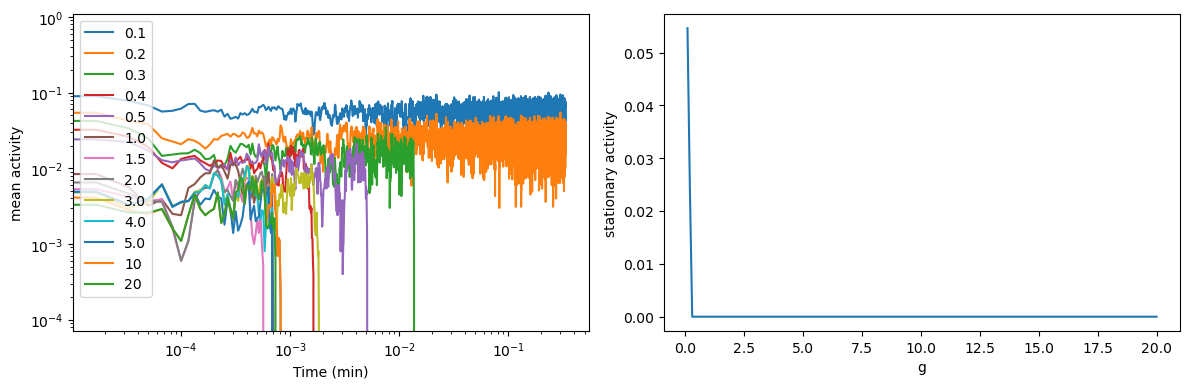

In [74]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
a=[]
for (i,g) in enumerate(gs):
    y = ts[i]
    axes[0].plot(np.arange(len(y))/60*system.dt, y, label=f"{g}" )
    a.append(y[-100:].mean())
axes[0].set_xlabel("Time (min)")
axes[0].set_ylabel("mean activity")
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_ylim(top=1.1)
axes[0].legend()

axes[1].plot(gs,a)
axes[1].set_xlabel("g")
axes[1].set_ylabel("stationary activity")
axes[1].set_yscale("linear")
axes[1].set_xscale("linear")

fig.tight_layout()